<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/Nutritional_Needs_Recommendation_based_on_Fuzzy_Lo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


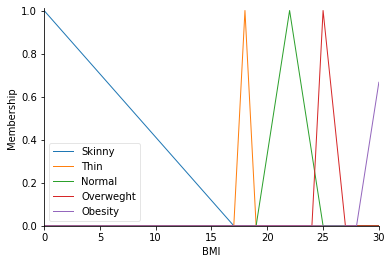

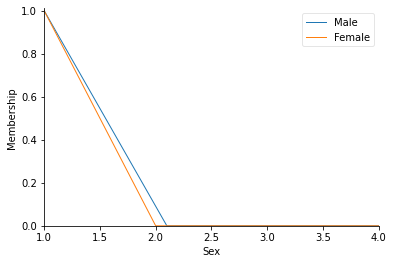

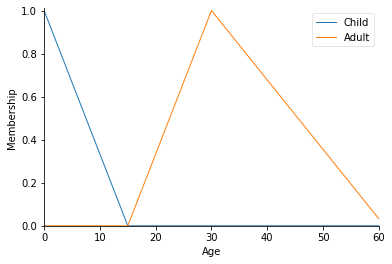

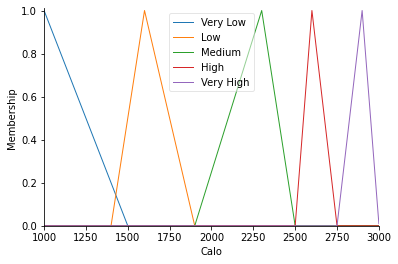

In [24]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

Sex = ctrl.Antecedent(np.arange(1,4.1,0.1),'Sex')
Age = ctrl.Antecedent(np.arange(0,61,1),'Age')
Calo = ctrl.Antecedent(np.arange(1000,3001,1),'Calo')
BMI = ctrl.Consequent(np.arange(0,31,1),'BMI')


BMI['Skinny'] = fuzz.trimf(BMI.universe, [0,0,17])
BMI['Thin'] = fuzz.trimf(BMI.universe, [17,18,19])
BMI['Normal'] = fuzz.trimf(BMI.universe, [19,22,25])
BMI['Overweght'] = fuzz.trimf(BMI.universe, [25,25,27])
BMI['Obesity'] = fuzz.trimf(BMI.universe, [28,31,31])

Sex['Male'] = fuzz.trimf(Sex.universe, [0,1,2.1])
Sex['Female'] = fuzz.trimf(Sex.universe, [0,1,2])

Age['Child'] = fuzz.trimf(Age.universe, [0,0,15])
Age['Adult'] = fuzz.trimf(Age.universe, [15,30,61])

Calo['Very Low'] = fuzz.trimf(Calo.universe, [1000,1000,1500])
Calo['Low'] = fuzz.trimf(Calo.universe, [1400,1600,1900])
Calo['Medium'] = fuzz.trimf(Calo.universe, [1900,2300,2500])
Calo['High'] = fuzz.trimf(Calo.universe, [2500,2600,2750])
Calo['Very High'] = fuzz.trimf(Calo.universe, [2750,2900,3001])
BMI.view()
Sex.view()
Age.view()
Calo.view()





In [25]:
rule1 = ctrl.Rule(Sex['Male']& Age['Child']& Calo['Very Low'], BMI['Skinny'])
rule2 = ctrl.Rule(Sex['Male']& Age['Child']& Calo['Low'], BMI['Thin'])
rule3 = ctrl.Rule(Sex['Male']& Age['Child']& Calo['Medium'], BMI['Normal'])
rule4 = ctrl.Rule(Sex['Male']& Age['Child']& Calo['High'], BMI['Overweght'])
rule5 = ctrl.Rule(Sex['Male']& Age['Child']& Calo['Very High'], BMI['Obesity'])
rule6 = ctrl.Rule(Sex['Male']& Age['Adult']& Calo['Very Low'], BMI['Thin'])
rule7 = ctrl.Rule(Sex['Male']& Age['Adult']& Calo['Low'], BMI['Skinny'])
rule8 = ctrl.Rule(Sex['Male']& Age['Adult']& Calo['Medium'], BMI['Normal'])
rule9 = ctrl.Rule(Sex['Male']& Age['Adult']& Calo['High'], BMI['Overweght'])
rule10 = ctrl.Rule(Sex['Male']& Age['Adult']& Calo['Very High'], BMI['Obesity'])
rule11 = ctrl.Rule(Sex['Female']& Age['Child']& Calo['Very Low'], BMI['Skinny'])
rule12 = ctrl.Rule(Sex['Female']& Age['Child']& Calo['Low'], BMI['Skinny'])
rule13 = ctrl.Rule(Sex['Female']& Age['Child']& Calo['Medium'], BMI['Thin'])
rule14 = ctrl.Rule(Sex['Female']& Age['Child']& Calo['High'], BMI['Normal'])
rule15 = ctrl.Rule(Sex['Female']& Age['Child']& Calo['Very High'], BMI['Overweght'])
rule16 = ctrl.Rule(Sex['Female']& Age['Adult']& Calo['Very Low'], BMI['Skinny'])
rule17 = ctrl.Rule(Sex['Female']& Age['Adult']& Calo['Low'], BMI['Thin'])
rule18 = ctrl.Rule(Sex['Female']& Age['Adult']& Calo['Medium'], BMI['Normal'])
rule19 = ctrl.Rule(Sex['Female']& Age['Adult']& Calo['High'], BMI['Overweght'])
rule20 = ctrl.Rule(Sex['Female']& Age['Adult']& Calo['Very High'], BMI['Obesity'])


25.42222222222222


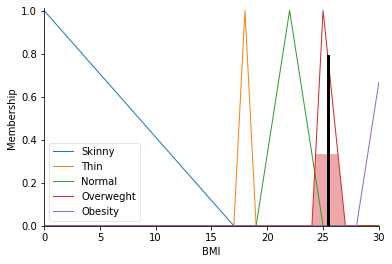

In [26]:
BMIing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
BMIing= ctrl.ControlSystemSimulation(BMIing_ctrl)
BMIing.input['Sex']=1
BMIing.input['Age']=20
BMIing.input['Calo']=2700
BMIing.compute()
print(BMIing.output['BMI'])
BMI.view(sim=BMIing)